halftime for leak: 856 mins
halftime for leak: 991 mins

hours for leak: 14.265 hrs
hours for leak: 16.509 hrs

difference: 134.59 mins
difference hrs: 2.24 hrs


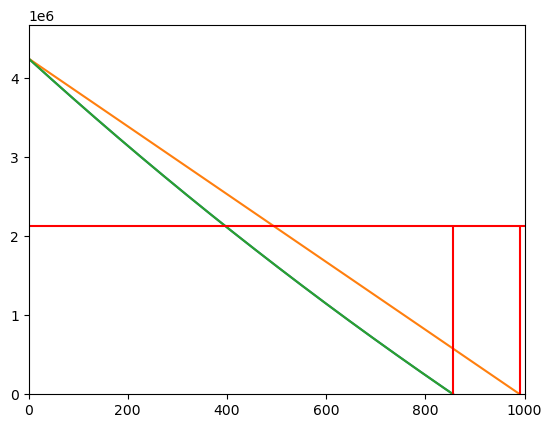

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import R
from scipy.optimize import fsolve, curve_fit
from scipy.stats import t

T = 273.15 + 21.0
P0 = 4.25e6
V = 0.570
k = 0.01/30.0

def p_leak(t):
    return (1/k) * ((k*P0 + R*T/V)*np.exp(-k*t) - R*T/V) 

def p_noleak(t):
    return P0 - t*R*T/V 

halftime_leak = fsolve(p_leak, 400)[0]
print(f'halftime for leak: {halftime_leak:.0f} mins')

halftime_noleak = fsolve(p_noleak, 400)[0]
print(f'halftime for leak: {halftime_noleak:.0f} mins')
print()

print(f'hours for leak: {halftime_leak/60:.3f} hrs')
print(f'hours for leak: {halftime_noleak/60:.3f} hrs')
print()

print(f'difference: {halftime_noleak - halftime_leak:.2f} mins')
print(f'difference hrs: {(halftime_noleak - halftime_leak)/60:.2f} hrs')

def func(t, a,b,c):
    return a * np.exp(b*t) + c

t = np.linspace(0,2000,1000)


popt = curve_fit(func, t, p_leak(t), p0=[17e6,-1/3000,-12.87e6])
a,b,c = popt[0]

plt.plot(t, p_leak(t) )
plt.plot(t, p_noleak(t) )
plt.plot(t, a*np.exp(b*t)+c)
plt.hlines(0.5*P0, 0,1000, color='red')
plt.vlines([halftime_leak, halftime_noleak], 0,0.5*P0, color='red')
plt.ylim(0)
plt.xlim(0,1000);

$$
P(t) = 17.12 \exp(-t/3000) - 12.87
$$

In [2]:
from scipy.stats import f

2*(1-f.cdf(3.0625, 23, 3))

0.38768080680801154

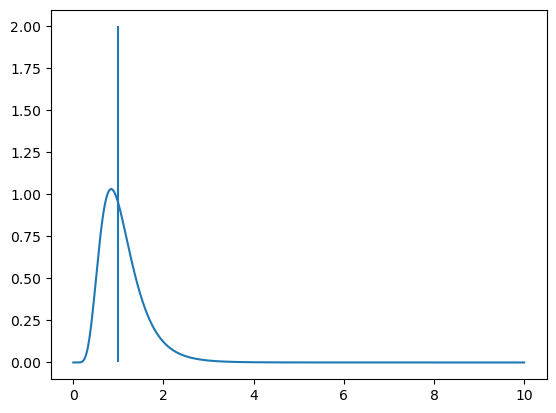

In [25]:
x = np.linspace(0,10,1000)
y = f.pdf(x, 23, 23)
plt.plot(x, y)
plt.vlines(1, 0, 2)

In [4]:
from scipy.stats import t
r = 0.7317
n=8
tval = r / np.sqrt((1-r**2)/(n-2))
tval

2.629432432610055

In [5]:
(1-t.cdf(tval, 6))

0.019544650272841912

In [6]:
from scipy.constants import Planck as h
from scipy.constants import proton_mass, speed_of_light
hbar = h / (2*np.pi)
a2 = 5 * (np.pi**2) * hbar**2 / (2 * proton_mass * 1.986*1e-23)
np.sqrt(a2)

2.8741373816928843e-09

In [7]:
np.sqrt((5 * h * 0.01)/(8 * proton_mass * speed_of_light))

2.873814813975366e-09

In [8]:
from scipy.stats import t, chi2, norm

t.ppf(0.05,9)

-1.8331129326536337

thermo 2 midterm 2 studying

In [9]:
import numpy as np
x1, x2 = 0.65, 0.35
pvap1, pvap2 = 32, 74
gamma1, gamma2 = np.exp(0.64*x2**2), np.exp(0.64*x1**2)

bubbleP = x1*gamma1*pvap1 + x2*gamma2*pvap2
print(f'bubble pressure: {bubbleP:.2f} kPa')

bubble pressure: 56.44 kPa


In [10]:
y1, y2 = 0.65, 0.35
Ptotal = 1 / (y1/pvap1 + y2/pvap2)
print(f'dew pressure: {Ptotal:.2f} kPa')

x1, x2 = y1*Ptotal/pvap1, y2*Ptotal/pvap2
print(f'x1: {x1:.2f} x2: {x2:.2f}')

gamma1, gamma2 = np.exp(0.64*x2**2), np.exp(0.64*x1**2)
Ptotal = 1 / (y1/pvap1/gamma1 + y2/pvap2/gamma2)
print(f'dew pressure: {Ptotal:.2f} kPa')

x1, x2 = y1*Ptotal/pvap1/gamma1, y2*Ptotal/pvap2/gamma2
print(f'x1: {x1:.2f} x2: {x2:.2f}')

gamma1, gamma2 = np.exp(0.64*x2**2), np.exp(0.64*x1**2)
Ptotal = 1 / (y1/pvap1/gamma1 + y2/pvap2/gamma2)
print(f'dew pressure: {Ptotal:.2f} kPa')

x1, x2 = y1*Ptotal/pvap1/gamma1, y2*Ptotal/pvap2/gamma2
print(f'x1: {x1:.2f} x2: {x2:.2f}')

gamma1, gamma2 = np.exp(0.64*x2**2), np.exp(0.64*x1**2)
Ptotal = 1 / (y1/pvap1/gamma1 + y2/pvap2/gamma2)
print(f'dew pressure: {Ptotal:.2f} kPa')

x1, x2 = y1*Ptotal/pvap1/gamma1, y2*Ptotal/pvap2/gamma2
print(f'x1: {x1:.2f} x2: {x2:.2f}')

gamma1, gamma2 = np.exp(0.64*x2**2), np.exp(0.64*x1**2)
Ptotal = 1 / (y1/pvap1/gamma1 + y2/pvap2/gamma2)
print(f'dew pressure: {Ptotal:.2f} kPa')

x1, x2 = y1*Ptotal/pvap1/gamma1, y2*Ptotal/pvap2/gamma2
print(f'x1: {x1:.2f} x2: {x2:.2f}')

dew pressure: 39.93 kPa
x1: 0.81 x2: 0.19
dew pressure: 43.56 kPa
x1: 0.86 x2: 0.14
dew pressure: 43.47 kPa
x1: 0.87 x2: 0.13
dew pressure: 43.46 kPa
x1: 0.87 x2: 0.13
dew pressure: 43.46 kPa
x1: 0.87 x2: 0.13


In [11]:
x1 = 0.25
A = 2.70
B = 0.50
from scipy.constants import R
T = 273.15 + 70

dG2 = R*T/x1/(1-x1) + 2*R*T*(-A-B*(24*x1**2-24*x1+5))
dG2

-1616.7611135375973

In [12]:
xe = 0.448
xb = 1-xe
pvape = 67.4611
pvapb = 68.9277
ptotal = 101.325

gammae = ptotal / pvape
gammab = ptotal / pvapb
print(f'gammae: {gammae:.2f} gammab: {gammab:.2f}')

gammae: 1.50 gammab: 1.47


2024 exam

In [13]:
x1 = 0.65
x2 = 1-x1
gamma1 = np.exp(1.5*x2**2)
print(f'gamma1: {gamma1:.4f}')
gamma2 = np.exp(1.5*x1**2)
pvap1, pvap2 = 0.8, 1.0
Ptotal = x1*gamma1*pvap1 + x2*gamma2*pvap2
print(f'Ptotal: {Ptotal:.4f} bar')
K1 = gamma1*pvap1/Ptotal
print(f'K1: {K1:.4f}')

zlimit = x1 * K1
print(f'zlimit: {zlimit:.4f}')

gamma1: 1.2017
Ptotal: 1.2845 bar
K1: 0.7484
zlimit: 0.4865


henry law and partition question

In [14]:
0.03 * 1e-3 *130.228 *150

0.586026

In [15]:
from scipy.constants import R
C = 30 / 1000
T = 300
pi = R*T*C*2 / 58.5 * 1000
pi

2558.296190200997

In [16]:
from scipy.constants import Avogadro

104/1000 /Avogadro

1.7269606298608004e-25

In [17]:
import numpy as np

# Constants
NA = 6.02214076e23  # Avogadro's number [1/mol]
kB = 1.380649e-23   # Boltzmann constant [J/K]

# Parameters for LJ 12-6 Polystyrene (from the paper and your LAMMPS script)
sigma_real = 0.57e-9           # σ in meters [m]
epsilon_real = 3.0e3 / NA      # ε in joules [J] (3.0 kJ/mol → J/particle)
mass_real = 104e-3 / NA        # Mass per bead [kg] (styrene monomer)

# Calculate LJ time unit (τ)
tau = sigma_real * np.sqrt(mass_real / epsilon_real)  # [s]
tau_ps = tau * 1e12  # Convert to picoseconds [ps]

# Thermal conductivity conversion factor
conversion_factor = epsilon_real / (tau * sigma_real**2)  # [W/(m·K)]

print(f"Time unit (τ): {tau_ps:.2f} ps")
print(f"Thermal conductivity conversion factor: {conversion_factor:.3f} W/(m·K)")

Time unit (τ): 3.36 ps
Thermal conductivity conversion factor: 4568669509.795 W/(m·K)


In [18]:
import numpy as np

# Constants
sigma_real = 0.57e-9           # σ in meters [m] (LJ 12-6 for PS)
epsilon_real = 3.0e3 / 6.022e23  # ε in J (3.0 kJ/mol → J/particle)
mass_real = 104e-3 / 6.022e23   # Mass per bead [kg] (styrene monomer)

# LJ time unit (τ) [s]
tau = sigma_real * np.sqrt(mass_real / epsilon_real)  
tau_ps = tau * 1e12  # Convert to picoseconds

# Thermal conductivity conversion factor [W/(m·K)]
conversion_factor = epsilon_real / (tau * sigma_real**2)

print(f"Time unit (τ): {tau_ps:.2f} ps")
print(f"Conversion factor: {conversion_factor:.6f} W/(m·K)")

Time unit (τ): 3.36 ps
Conversion factor: 4568776299.219993 W/(m·K)


In [19]:
import numpy as np
from scipy.constants import Boltzmann as kb
from scipy.constants import Avogadro
sigma = 0.57e-9       # [m]
epsilon = 3.0e3 / Avogadro # [J]
mass = 104.15e-3 / Avogadro    # [kg]
tau = sigma * np.sqrt(mass / epsilon)
conversion = epsilon / (tau * sigma**2)
print(f"Conversion factor: {conversion:.6f} W/(m·K)")  # Should output ~0.0457
print(kb/tau/sigma)

Conversion factor: 4565378355.920544 W/(m·K)
0.00721214685882518


In [20]:
print(f'{kb:.12e}')

1.380649000000e-23
